In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl



NOMOR 1

<TransferFunction>: sys[88]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


          500
------------------------
s^3 + 14 s^2 + 43 s + 30



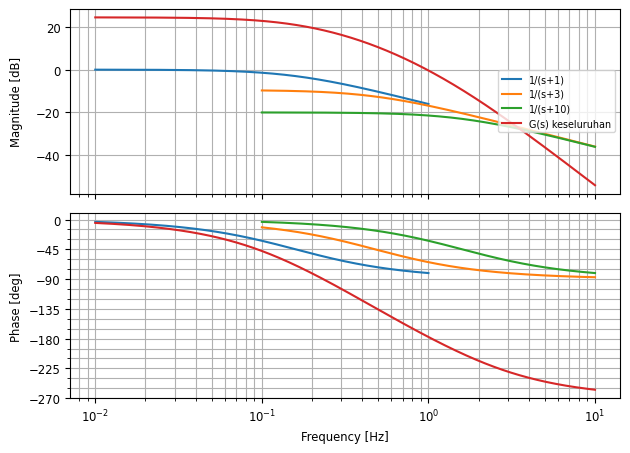

In [19]:
G1 = ctrl.tf([1], [1, 1])
G2 = ctrl.tf([1], [1, 3])
G3 = ctrl.tf([1], [1, 10])
K = 500
G = K * G1 * G2 * G3  # Sistem gabungan
print (G)

# Plot Bode untuk masing-masing faktor dan sistem gabungan
plt.figure()
ctrl.bode(G1, dB=True, Hz=True, deg=True, label='1/(s+1)')
ctrl.bode(G2, dB=True, Hz=True, deg=True, label='1/(s+3)')
ctrl.bode(G3, dB=True, Hz=True, deg=True, label='1/(s+10)')
ctrl.bode(G, dB=True, Hz=True, deg=True, label='G(s) keseluruhan')
plt.show()

G(j1) = -1.2066 + -0.0211j
G(j5) = -1.2081 + -0.0211j


c:\Users\Muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\lti.py:524: FutureWarning: freqresp() is deprecated; use frequency_response()
  warn("freqresp() is deprecated; use frequency_response()", FutureWarning)


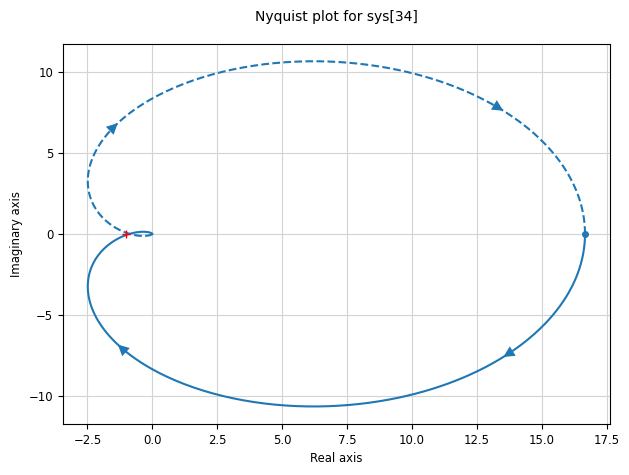

In [8]:
# Nyquist plot
plt.figure()
ctrl.nyquist(G)

# Hitung G(jω)
omega = [1, 5]
_, mag, phase = ctrl.freqresp(G, omega)
for i, w in enumerate(omega):
    Gjw = mag[i] * np.exp(1j * np.deg2rad(phase[i]))
    print(f"G(j{w}) = {Gjw.real:.4f} + {Gjw.imag:.4f}j")


In [9]:
gm, pm, wg, wp = ctrl.margin(G)
print(f"Gain Margin = {gm:.4f}, Phase Margin = {pm:.2f}°, Wcg = {wg:.2f} rad/s")
Kmax = gm  # Gain maksimum agar sistem stabil
print(f"Gain maksimum (Kmax) = {Kmax:.2f}")


Gain Margin = 1.1440, Phase Margin = 3.68°, Wcg = 6.56 rad/s
Gain maksimum (Kmax) = 1.14


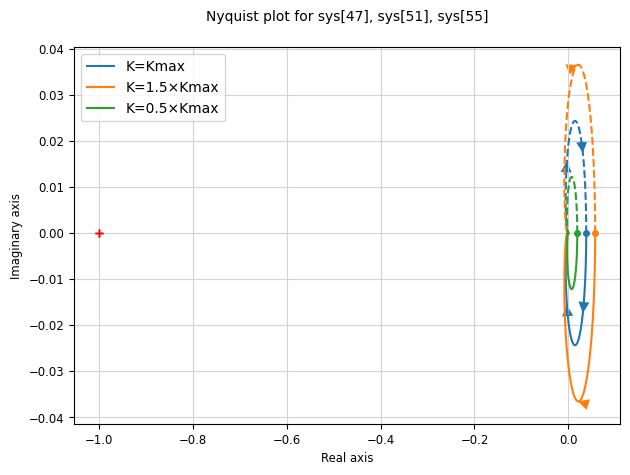

In [10]:
G_kmax = Kmax * G1 * G2 * G3
G_unstable = 1.5 * Kmax * G1 * G2 * G3
G_stable = 0.5 * Kmax * G1 * G2 * G3

plt.figure()
ctrl.nyquist(G_kmax, label='K=Kmax')
ctrl.nyquist(G_unstable, label='K=1.5×Kmax')
ctrl.nyquist(G_stable, label='K=0.5×Kmax')
plt.legend()


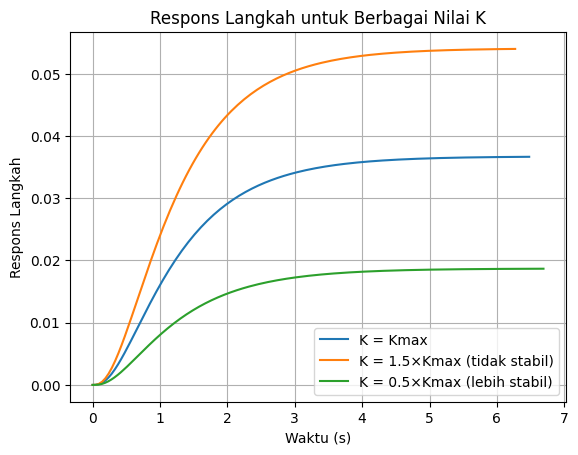

In [13]:
T_kmax = ctrl.feedback(G_kmax)
T_unstable = ctrl.feedback(G_unstable)
T_stable = ctrl.feedback(G_stable)

# Hitung response
t1, y1 = ctrl.step_response(T_kmax)
t2, y2 = ctrl.step_response(T_unstable)
t3, y3 = ctrl.step_response(T_stable)

# Plot dengan label
plt.figure()
plt.plot(t1, y1, label='K = Kmax')
plt.plot(t2, y2, label='K = 1.5×Kmax (tidak stabil)')
plt.plot(t3, y3, label='K = 0.5×Kmax (lebih stabil)')
plt.xlabel('Waktu (s)')
plt.ylabel('Respons Langkah')
plt.title('Respons Langkah untuk Berbagai Nilai K')
plt.legend()
plt.grid(True)
plt.show()

NOMOR 2

In [25]:
# Fungsi P(s) dan Gc(s) dari soal
P = ctrl.TransferFunction([1.163e8], [1, 962.5, 5.958e5, 1.16e8])
Gc = ctrl.TransferFunction([78.575 * (1), 78.575 * 2 * 436, 78.575 * 436**2], np.polymul([1, 132], [1, 8030]))

# Gabungan sistem terbuka: G(s) = Gc(s) * P(s)
G = ctrl.series(Gc, P)
print(G)

<TransferFunction>: sys[100]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


                9.138e+09 s^2 + 7.969e+12 s + 1.737e+15
-----------------------------------------------------------------------
s^5 + 9124 s^4 + 9.512e+06 s^3 + 5.999e+09 s^2 + 1.578e+12 s + 1.23e+14



<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

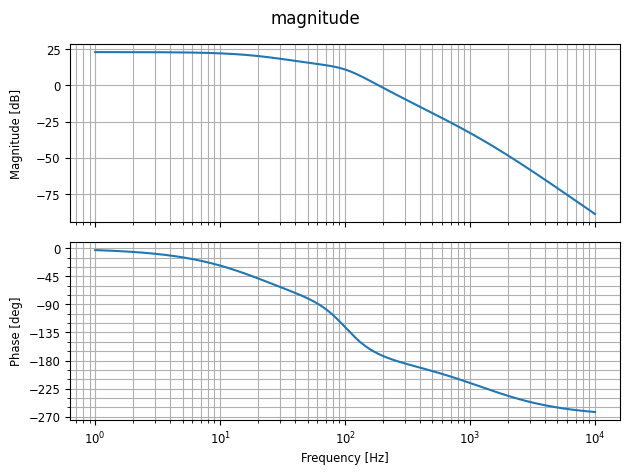

In [13]:
# a. Diagram Bode
plt.figure()
ctrl.bode(G, dB=True, Hz = True, deg = True)
plt.suptitle("Diagram Bode Gc(s) * P(s)")

plt.subplot(2,1,1)
plt.suptitle ("magnitude")
plt.grid


Text(0.5, 1.0, 'Diagram Nyquist Gc(s) * P(s)')

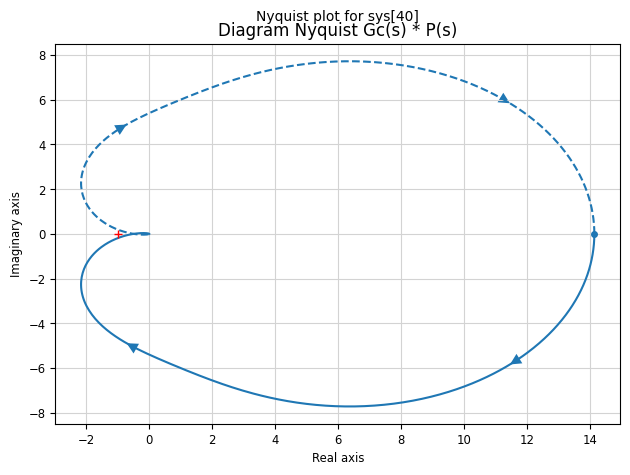

In [12]:
# b. Diagram Nyquist
plt.figure()
ctrl.nyquist_plot(G)
plt.title("Diagram Nyquist Gc(s) * P(s)")

In [14]:
# c. Cek kestabilan dengan margin() → digunakan juga untuk d
gm, pm, wg, wp = ctrl.margin(G)
print(f"Gain Margin (dB): {20*np.log10(gm):.2f}")
print(f"Phase Margin (deg): {pm:.2f}")
print(f"Frekuensi gain crossover (wg): {wg:.2f} rad/s")
print(f"Frekuensi phase crossover (wp): {wp:.2f} rad/s")

Gain Margin (dB): 6.05
Phase Margin (deg): 10.46
Frekuensi gain crossover (wg): 1584.49 rad/s
Frekuensi phase crossover (wp): 1165.62 rad/s


In [16]:
# d. Dapatkan batas penguatan maksimum agar tetap stabil
K_max = gm
print ("batas penguatan sistem : ", K_max)

batas penguatan sistem :  2.007716706025211


c:\Users\Muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\freqplot.py:1786: UserWarning: number of encirclements does not match Nyquist criterion; check frequency range and indent radius/direction
  nyquist_responses = nyquist_response(


Text(0.5, 1.0, 'Nyquist dari Tiga Variasi Penguatan')

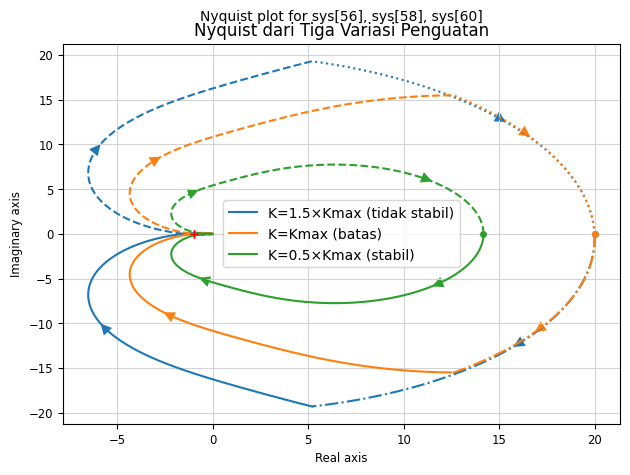

In [17]:
# e. Coba 3 kondisi:
K1 = 1.5 * K_max  # tidak stabil
K2 = K_max        # tepat di batas
K3 = 0.5 * K_max  # lebih stabil

G1 = K1 * G
G2 = K2 * G
G3 = K3 * G

# Nyquist ketiga variasi
plt.figure()
ctrl.nyquist_plot(G1, label='K=1.5×Kmax (tidak stabil)')
ctrl.nyquist_plot(G2, label='K=Kmax (batas)')
ctrl.nyquist_plot(G3, label='K=0.5×Kmax (stabil)')
plt.legend()
plt.title("Nyquist dari Tiga Variasi Penguatan")

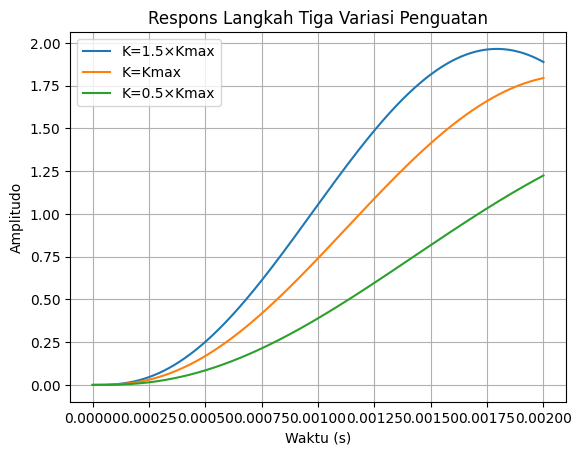

In [18]:
# f. Respons langkah untuk sistem tertutup dengan 3 variasi K
T1 = ctrl.feedback(G1)
T2 = ctrl.feedback(G2)
T3 = ctrl.feedback(G3)

time = np.linspace(0, 0.002, 1000)  # skala waktu pendek karena sistem cepat
t1, y1 = ctrl.step_response(T1, time)
t2, y2 = ctrl.step_response(T2, time)
t3, y3 = ctrl.step_response(T3, time)

plt.figure()
plt.plot(t1, y1, label='K=1.5×Kmax')
plt.plot(t2, y2, label='K=Kmax')
plt.plot(t3, y3, label='K=0.5×Kmax')
plt.title("Respons Langkah Tiga Variasi Penguatan")
plt.xlabel("Waktu (s)")
plt.ylabel("Amplitudo")
plt.grid(True)
plt.legend()

plt.show()